<a href="https://colab.research.google.com/github/heidimag/DS1000/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4

In this lab we covered:

1. Generate normal data
2. Compute normal proportions.

## Standard Normal Distribution (mean of zero and variance of one)

**numpy.random.randn:** https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html

Introducting the `scipy` Package

In [12]:
pip install scipy

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import randn

### Generating data from the standard normal distribution
$$X_i \sim N(0,1), i = 1, \dotsc, n$$

In Python, when we want to generate `n` observations from the standard normal distribution we can use the function `randn(n)` from the `numpy` Package.

When we generate values from a distribution, we get a random sample, which means that everytime you generate observations from that distribution you will get different results. To fix your sample, so that you will always get the same values we use the function `random.seed()` from the `numpy` Package. Inside the `()` we put any integer you want (called seed) and if you use the same seed another time you'll get the same random sample.

#### Random sample of size 100

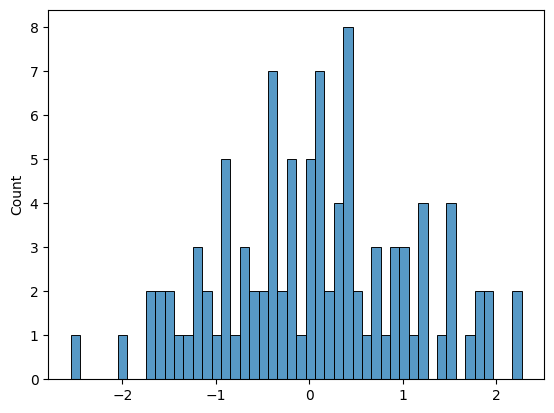

In [3]:
# We need to set a seed in order to be able to reproduce the results.
np.random.seed(0)

# Standard normal distribution with 100 points
data_100 = randn(100)
sns.histplot(data_100, binwidth = 0.1)
plt.show()

#### Random sample of size 1000

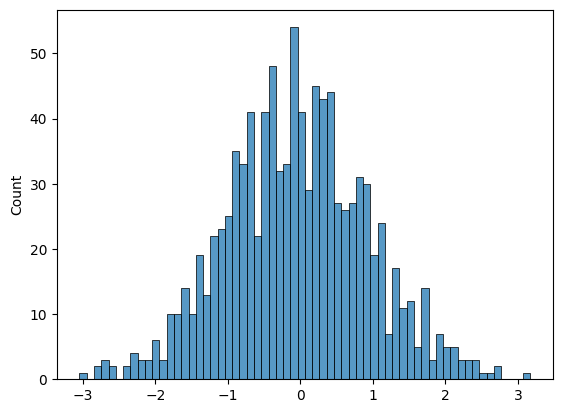

In [4]:
# Standard normal distribution with 1000 points
data_1000 = randn(1000)
sns.histplot(data_1000, binwidth = 0.1)
plt.show()

#### Random sample of size 10000

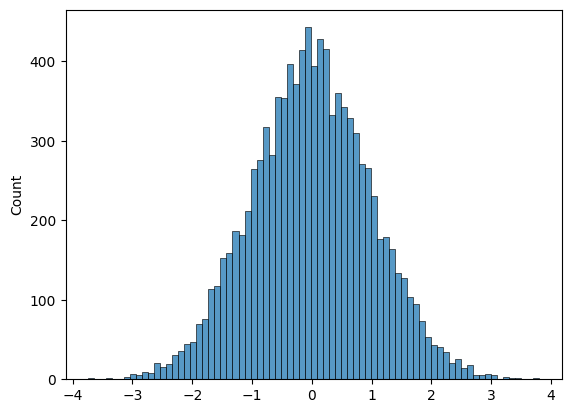

In [5]:
# Standard normal distribution with 10000 points
data_10000 = randn(10000)
sns.histplot(data_10000, binwidth = 0.1)
plt.show()

**Conclusion**: As we increase the sample size we can see that the histogram resemble more a standard normal distribution.

**Practice:** Generate a sample of size `50` from the standard normal distribution with `np.random.seed(10)`  and plot the histogram of the sample using `bins = 10` instead of `binwidth = 0.1`.

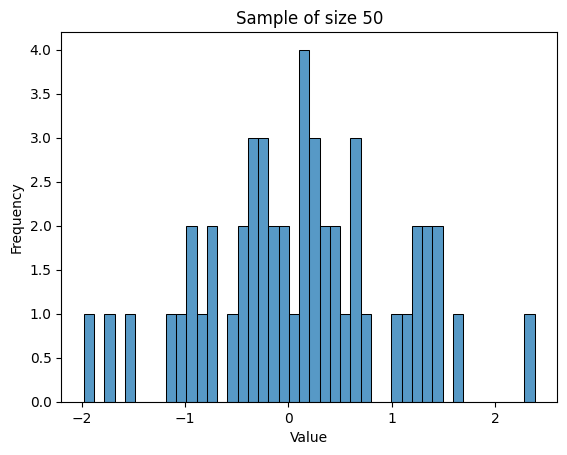

In [18]:
# your code here
np.random.seed(10)

data_50 = randn(50)
sns.histplot(data_50,binwidth=0.1)
plt.title('Sample of size 50')
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.show()

## Normal Distribution

We can also generate observations from normal distributiom with $\mu \neq 0$ and $\sigma \neq 1$. They are called normal distributions and we need to specify the mean $\mu$ and standard deviation $\sigma$ we want. To generate samples from normal distributions that are not the stardard normal distribution we use the function `norm.rvs` function from `scipy` Package and we can specify the mean we want using the argument `loc` and the standard deviation using the argument `scale`.

To use a random seed we don't need to use `np.random.seed()` as in the previous example, for these normal distributions we can specify the random seed using the argument `random_state`.

**scipy.stats.norm:** https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [10]:
help(norm.rvs)

Help on method rvs in module scipy.stats._distn_infrastructure:

rvs(*args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Random variates of given type.
    
    Parameters
    ----------
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information).
    loc : array_like, optional
        Location parameter (default=0).
    scale : array_like, optional
        Scale parameter (default=1).
    size : int or tuple of ints, optional
        Defining number of random variates (default is 1).
    random_state : {None, int, `numpy.random.Generator`,
                    `numpy.random.RandomState`}, optional
    
        If `random_state` is None (or `np.random`), the
        `numpy.random.RandomState` singleton is used.
        If `random_state` is an int, a new ``RandomState`` instance is
        used, seeded with `random_state`.
        If `random_state` is already a ``Ge

#### Generating 1000 data points from a normal distribution with mean of 10 and standard deviation of 2.

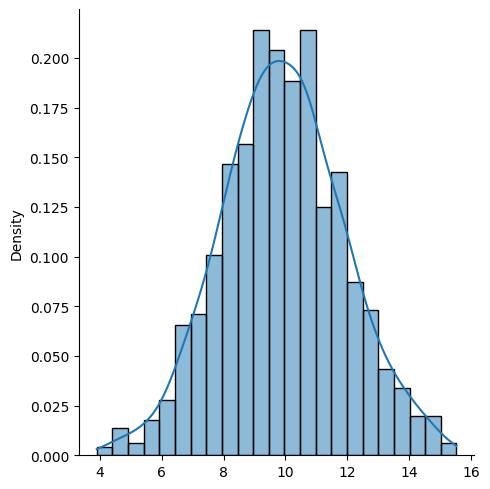

In [11]:
# loc and scale denote mean and standard deviation, respectively.
normal = norm.rvs(loc = 10, scale = 2, size = 1000, random_state = 0) # loc is the mean and scale is the standard deviation.

sns.displot(normal, stat = 'density', kde = True) #kde plots the curve
plt.show()

## Computing normal proportions

#### Finding the probability that a normal distribution with mean ($\mu$) 10 and standard deviation ($\sigma$) 2 has a value less than or equal to 12.

$$P(X \leq 12)$$

This type of probability is called cumulative probability since it has the $\leq$ symbol. We can use the function `norm.cdf` from the `scipy` Package to get cumulative probabilities in any normal distribution.

**Recipe:** `norm.cdf(x, loc, scale)`

Here `x` is the probability, `loc` is the mean ($\mu$) and `scale` is the standard deviation ($\sigma$).

In [19]:
norm.cdf(12, loc = 10, scale = 2)

0.8413447460685429

This probability corresponds to the following area under the density curve:

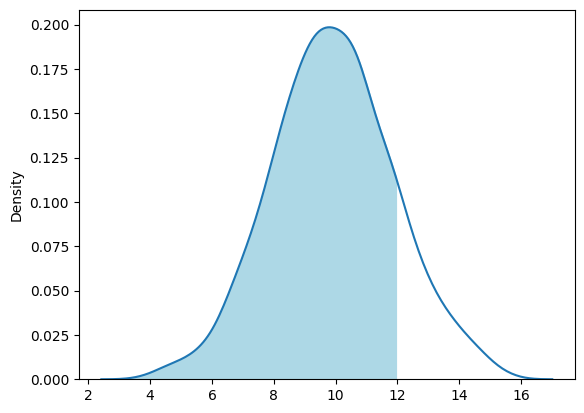

In [20]:
points = sns.kdeplot(normal).get_lines()[0].get_data()
x = points[0]
y = points[1]
plt.fill_between(x,y, where = x <=12, color='lightblue')

#### Computing probabilities using the **z-score** and the standard normal distribution.
$$z = \frac{x - \mu}{\sigma}$$

$$P(X \leq 12) = P\left(Z \leq \frac{12 - 10}{2}\right) = P(Z \leq 1)$$

In [21]:
z = (12 - 10)/2
print(z)

1.0


In [22]:
norm.cdf(1) ## in this case the default for loc and scale is 0 and 1, a standard normal distribution

0.8413447460685429

#### Finding the probability that the variable has a value greater than or equal to 12. This probability is equal to 1 - norm.cdf(12, loc = 10, scale = 2).

$$P(X \geq 12) = 1 - P(X < 12)$$

In [23]:
1 - norm.cdf(12, loc = 10, scale = 2)

0.15865525393145707

This probability corresponds to the following area under the density curve:

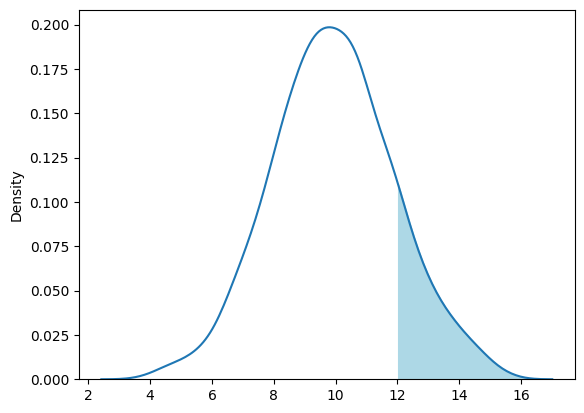

In [24]:
points = sns.kdeplot(normal).get_lines()[0].get_data()
x = points[0]
y = points[1]
plt.fill_between(x,y, where = x >=12, color='lightblue')

#### Finding the variable value that gives you a certain probability.

Let's imagine that we want to find what is the value (x) in the normal distribution that has an area at the left of that value equals to 0.84. That is, $P(X \leq x) = 0.84$

To answer this question we can use the function `norm.ppf` that gives as the value instead of the probability for a normal distribution.

Example 1: which variable value x gives you a probability of 0.84 for that variable to be less than or equal to x?

In [26]:
#?norm.ppf
#Percent point function (inverse of `cdf`) at q of the given RV.

In [25]:
norm.ppf(0.84, loc = 10, scale = 2)

11.988915766419506

**Pratice:** Which variable value x gives you a probability of 0.025 for the variable to be less than or equal to x? Assume that the mean is still 10 and the standard deviation is 2.

In [28]:
# your code
x = norm.ppf(0.025, loc = 10, scale = 2)

print(f'The value of x is: {x}')

The value of x is: 6.080072030919891


Another example: What is the value x that gives you a probability of 0.16 for the variable to be greater than or equal to x?

$$P(X \geq x) = 0.16$$

Let's rewrite this probability to be with $\leq$ instead of $\geq$ so we can use the `norm.ppf`function.$$P(X \geq x) = 1 - P(X \leq x) = 0.16$$
$$P(X \leq x) = 1 - 0.16 = 0.84$$

In [29]:
norm.ppf(1-0.16, loc = 10, scale = 2) ## this value is the same as the one in Example 1

11.988915766419506

# The 68–95–99.7 Rule

### Plotting the probability density function (pdf) corresponding to a normal distribution with a mean (mu) of 10 and a standard deviation (sigma) of 2 from scratch.

Let's start by creating a range of values between $\mu - 4\times\sigma$ and  $\mu + 4\times\sigma$.

In [30]:
mu = 10
sigma = 2
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
x # creating a range of x values

array([ 2.        ,  2.01601602,  2.03203203,  2.04804805,  2.06406406,
        2.08008008,  2.0960961 ,  2.11211211,  2.12812813,  2.14414414,
        2.16016016,  2.17617618,  2.19219219,  2.20820821,  2.22422422,
        2.24024024,  2.25625626,  2.27227227,  2.28828829,  2.3043043 ,
        2.32032032,  2.33633634,  2.35235235,  2.36836837,  2.38438438,
        2.4004004 ,  2.41641642,  2.43243243,  2.44844845,  2.46446446,
        2.48048048,  2.4964965 ,  2.51251251,  2.52852853,  2.54454454,
        2.56056056,  2.57657658,  2.59259259,  2.60860861,  2.62462462,
        2.64064064,  2.65665666,  2.67267267,  2.68868869,  2.7047047 ,
        2.72072072,  2.73673674,  2.75275275,  2.76876877,  2.78478478,
        2.8008008 ,  2.81681682,  2.83283283,  2.84884885,  2.86486486,
        2.88088088,  2.8968969 ,  2.91291291,  2.92892893,  2.94494494,
        2.96096096,  2.97697698,  2.99299299,  3.00900901,  3.02502503,
        3.04104104,  3.05705706,  3.07307307,  3.08908909,  3.10

Let's compute now for each value in the range what is the probability of that value using the `norm.pdf` function.

In [31]:
pdf = norm.pdf(x, loc = mu, scale = sigma) # calculating the density values corresponding to each x

Then, we plot the range of values in the xaxis and the pdf values in the yaxis to get the density distribution plot.

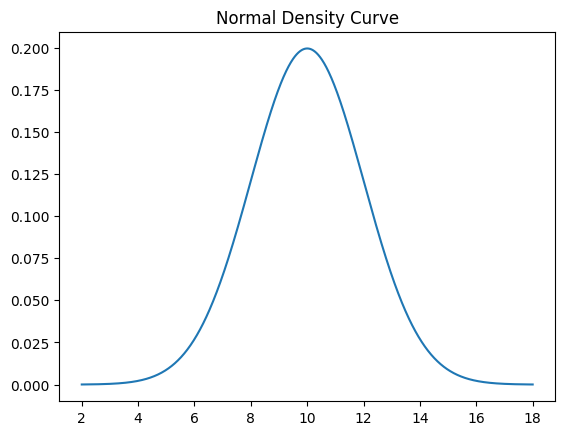

In [32]:
plt.plot(x, pdf) # ploting density versus x
plt.title('Normal Density Curve')
plt.show()

### Percentage of observations within one standard deviation from the mean. That is between (mu - sigma) and (mu + sigma):

$$P(\mu - \sigma < X < \mu + \sigma) = P(X < \mu + \sigma) - P(X < \mu - \sigma)$$

In [37]:
cdf_upper_limit = norm.cdf(mu + sigma, loc = mu, scale = sigma)
cdf_lower_limit = norm.cdf(mu - sigma, loc = mu, scale = sigma)


percent = cdf_upper_limit - cdf_lower_limit


print(np.round(percent * 100, 2), '% of observations fall between (mu - sigma) and (mu + sigma).')

68.27 % of observations fall between (mu - sigma) and (mu + sigma).


This percentage corresponds to the following area under the curve:

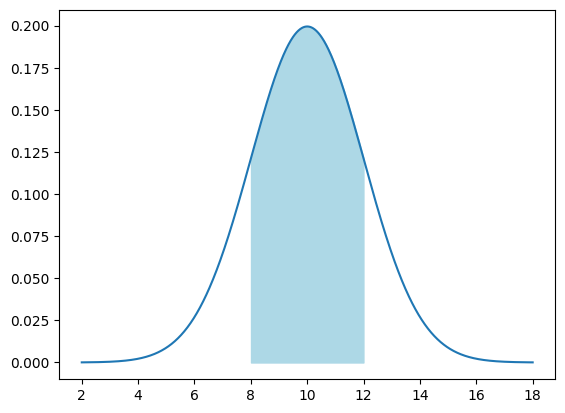

In [35]:
plt.plot(x, pdf)
plt.fill_between(x,pdf, where = (x<=12) & (x>=8), color='lightblue')

### Percentage of observations between (mu - 2 * sigma) and (mu + 2 * sigma):

$$P(\mu - 2\times\sigma < X < \mu + 2\times\sigma) = P(X < \mu + 2\times\sigma) - P(X < \mu - 2\times\sigma)$$

In [38]:
cdf_upper_limit = norm.cdf(mu + 2 * sigma, loc = mu, scale = sigma)
cdf_lower_limit = norm.cdf(mu - 2 * sigma, loc = mu, scale = sigma)


percent = cdf_upper_limit - cdf_lower_limit


print(np.round(percent * 100, 2), '% of observations fall between (mu - 2 * sigma) and (mu + 2 * sigma).')

95.45 % of observations fall between (mu - 2 * sigma) and (mu + 2 * sigma).


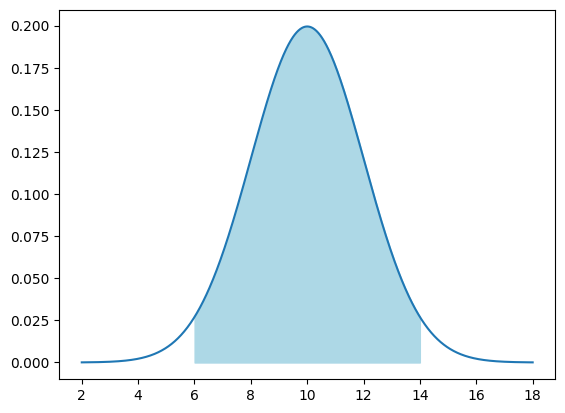

In [39]:
plt.plot(x, pdf)
plt.fill_between(x,pdf, where = (x<=14) & (x>=6), color='lightblue')

### Percentage of observations between (mu - 3 * sigma) and (mu + 3 * sigma):

$$P(\mu - 3\times\sigma < X < \mu + 3\times\sigma) = P(X < \mu + 3\times\sigma) - P(X < \mu - 3\times\sigma)$$

In [ ]:
# Percentage of observations between (mu - 3 * sigma) and (mu + 3 * sigma)
cdf_upper_limit = norm.cdf(mu + 3 * sigma, loc = mu, scale = sigma)
cdf_lower_limit = norm.cdf(mu - 3 * sigma, loc = mu, scale = sigma)


percent = cdf_upper_limit - cdf_lower_limit


print(np.round(percent * 100, 2), '% of observations fall between (mu - 3 * sigma) and (mu + 3 * sigma).')

In [ ]:
plt.plot(x, pdf)
plt.fill_between(x,pdf, where = (x<=16) & (x>=4), color='lightblue')